## Final Project -  Regression Analysis

### Author: Mahesh Bashyal

### Date: November 23, 2025


### Introduction: In this project we will use the Medical Cost dataset to explore how different factors such as age, BMI, region, smoking status and number of children predict insurance charges. We will use regression techniques to predict insurance charges by evaluating these features. We will perform this in a series of steps such as Data import and inspect, data exploration, feature engineering, evaluation of different models and models comparison. 

In [58]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler





## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows.

In [59]:
## Load the data
df = pd.read_csv("/Users/maheshbashyal/Repos/ml_regression_Bashyal/data/insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for missing values and summary statistics

In [60]:
df.isnull().sum()
df.describe(include= "all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [61]:
# Convert yes/no to 1/0
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})


### Reflection 1

### What do you notice about the dataset? The dataset does not have missing values. The range of the age is from 18 - 64 and the mean values is 39. The mean for BMI is 30.66. The maximum and minimum BMI values were 53.13 and 15.96, respectively. 

### Are there any data issues? There does not appear to be any issue with the data. 



## Section 2. Data Exploration and Preparation


### We will use histograms and boxplots to look at any outliers, and to understand the pattern of the data

/var/folders/5k/fwq15zcn2dl48y9txqlt51fc0000gn/T/ipykernel_87189/1367587099.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=palette)
/var/folders/5k/fwq15zcn2dl48y9txqlt51fc0000gn/T/ipykernel_87189/1367587099.py:18: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=df, x=col, palette=palette)


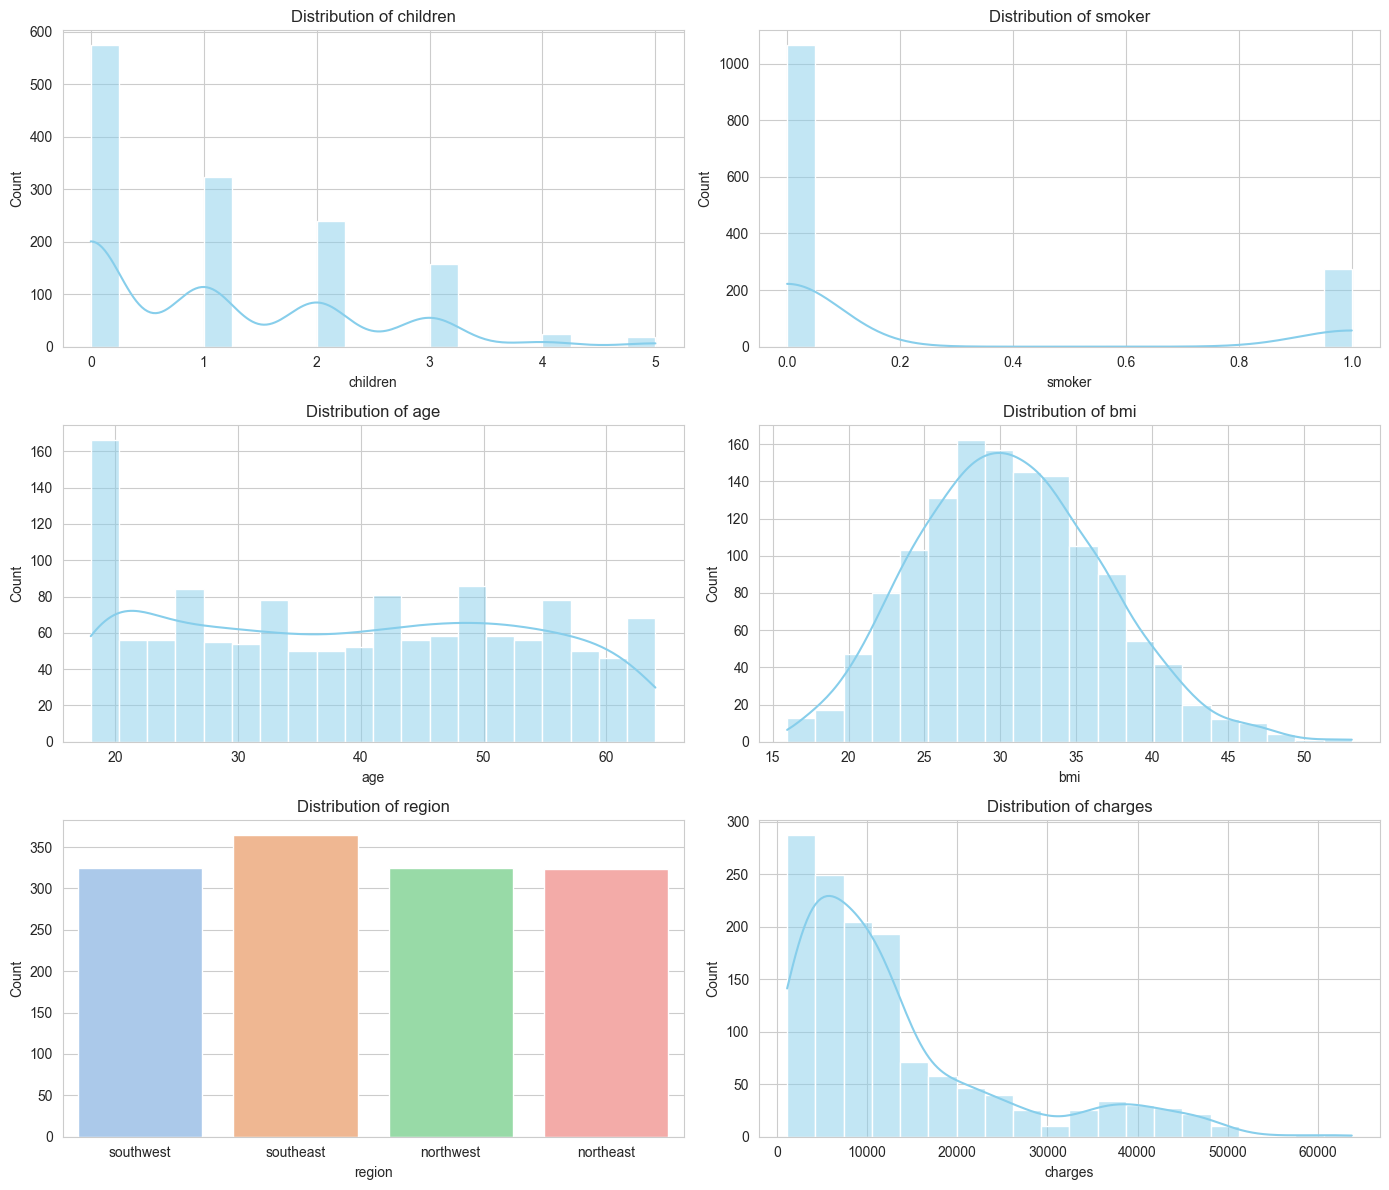

In [62]:
# Columns to plot
columns = ['children', 'smoker', 'age', 'bmi', 'region', 'charges']

# Set Seaborn style
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Determine layout
n_cols = 2
n_rows = (len(columns) + 1) // n_cols  # Auto-adjust rows

plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if df[col].dtype == 'object':  # Categorical column
        sns.countplot(data=df, x=col, palette=palette)
        plt.ylabel('Count')
    else:  # Numerical column
        sns.histplot(df[col], bins=20, kde=True, color='skyblue')
        plt.ylabel('Count')
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()



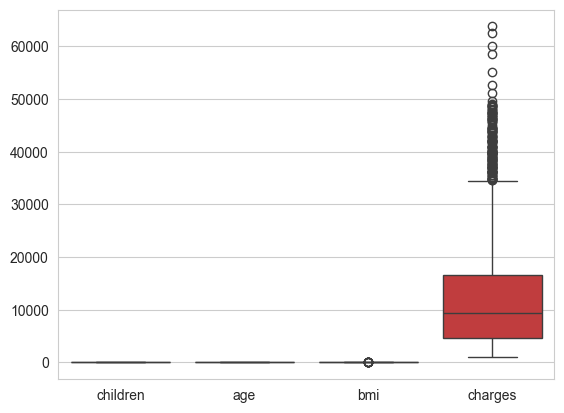

In [63]:
sns.boxplot(data=df[['children', 'age', 'bmi', 'charges']])
plt.show()

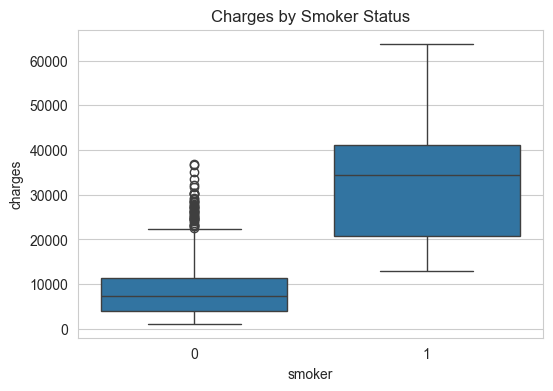

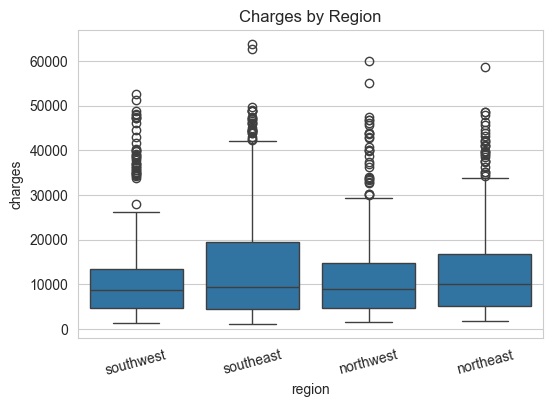

In [64]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Charges by Smoker Status")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="region", y="charges")
plt.title("Charges by Region")
plt.xticks(rotation=15)
plt.show()

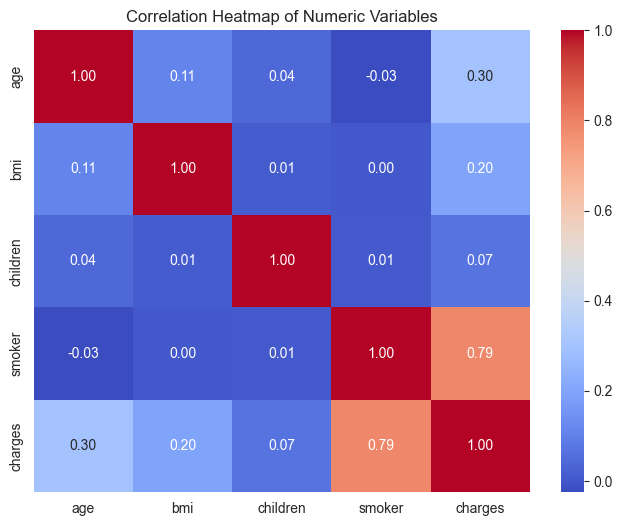

In [65]:
### Create a heatmap to evaluate which variables have stronger effect on insurance charges.
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


### Reflection 2:

- #### What patterns or anomalies do you see?
- #### The histogram for BMI seems to be centered around 30.
- #### The histogram for charges seems to be right skewed
- #### Age seems to have even distribution
- #### Do any features stand out? 
- #### The box plot for smoker shows that smoking likely has a strong impact on insurance charges. 
- #### The correlation heatmap indicates that there is a strong relationship between charges and age, bmi and smoker status. 
- #### What preprocessing steps were necessary to clean and improve data? I converted categorical data (i.e., somker status to numeric data)

  

## Section 3 - Feature Selection and Justification

### 3.1 Choose Features and Target

### Target Variable 'Y' is Charges.

### X = age, bmi, children, smoker, region, sex

### 3.2 Define X and y

In [74]:
# Defining input and target features
X = df[["age","bmi", "children", "smoker", ]]
y = df["charges"]


### Reflection 3:

### Why did you choose these features? 
- #### I selected age, BMI, Children and smoker as the input features because the correlation heat map and the box plot for the case of smoker status indicate a strong relationship between these features and charges.
- #### Moreover, it is likely that people with higher BMI have increased risks to health conditions. Similarly, older people may contribute more towards the insurance charges. Smoking increases several health risks and finally more number of children probably means more insurance costs. 

### How might they impact predictors or accuracy?

- #### Overall, I am confident that these features should have a strong impact on the prediction of insurance charges. 


## Section 4 - Train a Model (Linear Regression)


### 4.1 Split the Data into Train/Test sets

In [75]:
# Select the chosen features
X = df[["age","bmi", "children", "smoker", ]]
y = df["charges"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 4.2 Train the Model

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4.3 Evaluate Performance


In [77]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R²: 0.7811147722517886
MAE: 4213.798594527248
RMSE: 5829.378521780667


### Reflection 4:

- #### How well did the model perform?
  #### The model did a good job in predicting insurance charges. The R squared values was 0.78 which meant that this model could explain 78% of the variation in charges.
  #### The MAE and RMSE were 4213 and 5829 respectively.

## Section 5 - Evaluate Model Performance

### Pipeline 1: Imputer → StandardScaler → Linear Regression


In [78]:
# Pipeline 1
pipeline_Im1 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

pipeline_Im1.fit(X_train, y_train)

y_pred_Im1 = pipeline_Im1.predict(X_test)

r2_Im1 = r2_score(y_test, y_pred_Im1)
mae_Im1 = mean_absolute_error(y_test, y_pred_Im1)
rmse_Im1 = np.sqrt(mean_squared_error(y_test, y_pred_Im1))

print("Pipeline 1: Standard Linear Regression")
print("R²:", r2_Im1)
print("MAE:", mae_Im1)
print("RMSE:", rmse_Im1)

Pipeline 1: Standard Linear Regression
R²: 0.7811147722517887
MAE: 4213.798594527246
RMSE: 5829.378521780666


### 5.2 Pipeline 2: Imputer - Polynomial Features (degree=3) - StandardScaler - Linear Regression

In [79]:
# Pipeline 2
pipeline_polynomial3 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("poly", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

pipeline_polynomial3.fit(X_train, y_train)

y_pred_polynomial3 = pipeline_polynomial3.predict(X_test)

r2_polynomial3 = r2_score(y_test, y_pred_polynomial3)
mae_polynomial3 = mean_absolute_error(y_test, y_pred_polynomial3)
rmse_polynomial3 = np.sqrt(mean_squared_error(y_test, y_pred_polynomial3))

print("Pipeline 2: Polynomial Regression (degree=3)")
print("R²:", r2_polynomial3)
print("MAE:", mae_polynomial3)
print("RMSE:", rmse_polynomial3)

Pipeline 2: Polynomial Regression (degree=3)
R²: 0.8690550878812893
MAE: 2745.5381461565735
RMSE: 4508.772726777389


### 5.3 Comparing Model Performance

In [80]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial (Degree 3)"],
    "R²": [r2_Im1, r2_polynomial3],
    "MAE": [mae_Im1, mae_polynomial3],
    "RMSE": [rmse_Im1, rmse_polynomial3]
})

results

,Model,R²,MAE,RMSE
0,Linear Regression,0.781115,4213.798595,5829.378522
1,Polynomial (Degree 3),0.869055,2745.538146,4508.772727


## Reflection 5:


- ### When comparing the models, which model performed better?
  #### Between the Linear Regression model and the Polynomial (degree 3) model, the polynomial model performed better. This is explained by the fact that the R squared for the polynomial model was much better (0.86 vs 0.78) than the linear regression model and also the polynomial model has lower MAE and RMSE values. 


- ### How did scaling impact the results?
  ### When scaling was added to the linear regression model, it did not produce different results, i.e., the results were similar. It appears that for linear regression model, scaling does not drastically change results. 

## Section 6. Final Thoughts and Insights

### Section 6.1 Summary of Findings

- #### In this project, I learnt how to predict insurance charges using different features such as age, BMI, children, and smoker status. I used various regression models. The standard linear regression model (base model) showed a R squared value of 0.78 which meant this model explained 78% of the variation in the insurance charges. When we added a scaling component to the standard base model, it did not produce different results. I also learnt that the polynomial (3 degree) model was the best of all these models with the R squared value of 0.86 and lower MAE and RMSE values.

### Section 6.2 Challenges 
- #### I would occasionally run into errors while running the codes which i fix it by using AI and online resources
- #### It was also challenging to interpret all the results and compare the models and often needed to understand them well. 


### Section 6.3 What would I do if I had more time?
- #### If i had more time I would explore more models to see which predicts insurance charges more effectively. One model which I would look into would be a Random Forest model. 

## Reflection 6: What I Learned
- #### Overall, from this project I learned how to import the data, explore the data, use feature engineering, convert categorial data to numerical data, run several models, evaluate them and compare those models based on metrics such as R squared, MAE and RMSE values. I was able to predict insurance charges based on features like BMI, age, children and smoker status. 